Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Dryden Swai"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 2 - Using Yahoo Finance `yfinance` library

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
#yf.pdr_override()

#amzn = pdr.get_data_yahoo('AMZN', start = start)


In [3]:
# 2) Using fix_yahoo_finance library only to download AMZN data

#amzn = yf.download('AMZN', start=start)

In [4]:
# Download the information for the stocks for assignment

all_stocks_list = ['AMZN', 'META','MMM','IBM']
all_stocks = yf.download(all_stocks_list, start = '2018-11-12',end='2023-11-13',progress=False)

In [5]:
#Filter for just the adjusted close prices and check the information to confirm
df = all_stocks['Adj Close']
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-11-12 to 2023-11-10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1258 non-null   float64
 1   IBM     1258 non-null   float64
 2   META    1258 non-null   float64
 3   MMM     1258 non-null   float64
dtypes: float64(4)
memory usage: 49.1 KB


In [6]:
df

,AMZN,IBM,META,MMM
Date,,,,
2018-11-12,81.842499,90.564621,141.550003,160.041077
2018-11-13,81.558502,90.519676,142.160004,161.121292
2018-11-14,79.950500,90.040268,144.220001,160.869492
2018-11-15,80.972000,90.969124,143.850006,166.433304
2018-11-16,79.670502,91.066505,139.529999,169.755264
...,...,...,...,...
2023-11-06,139.740005,147.299454,315.799988,92.071121
2023-11-07,142.710007,147.161026,318.820007,91.706856
2023-11-08,142.080002,146.369995,319.779999,90.889717


In [7]:
#Resample the data to get the last business day of each month
dfBms = df.resample('BM').last()
dfBms = dfBms.iloc[:60, :]
dfBms

,AMZN,IBM,META,MMM
Date,,,,
2018-11-30,84.508499,93.089043,140.610001,170.031342
2018-12-31,75.098503,85.148727,131.089996,155.818436
2019-01-31,85.936501,100.692291,166.690002,163.799927
2019-02-28,81.991501,104.676949,161.449997,170.770477
2019-03-29,89.037498,106.927658,166.690002,171.091599
2019-04-30,96.325996,106.298676,193.399994,156.047607
2019-05-31,88.753502,97.378044,177.470001,132.667923
2019-06-28,94.681503,105.744019,193.000000,143.954056
2019-07-31,93.338997,113.672867,194.229996,145.100098


<Axes: title={'center': 'An Autocorrelation Graph of Amazon Stock'}, xlabel='Lag (Months)', ylabel='Correlation'>

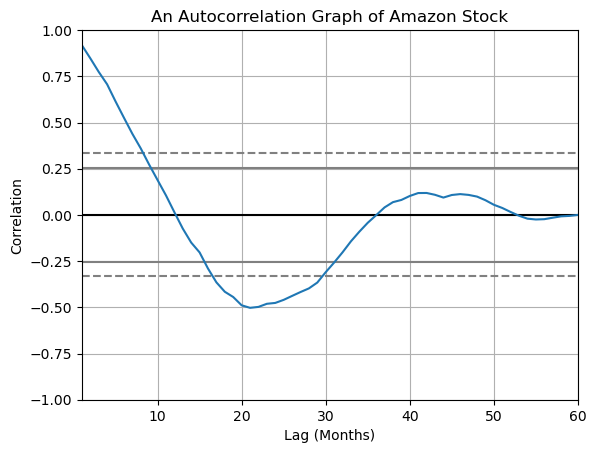

In [8]:
#Create an autocorrelation graph for the amazon stock
amzn=dfBms['AMZN']
amznplot = pd.plotting.autocorrelation_plot(amzn)
amznplot.set_title("An Autocorrelation Graph of Amazon Stock")
amznplot.set_ylabel("Correlation")
amznplot.set_xlabel("Lag (Months)")
amznplot

<Axes: title={'center': 'An Autocorrelation Graph of IBM Stock'}, xlabel='Lag (Months)', ylabel='Correlation'>

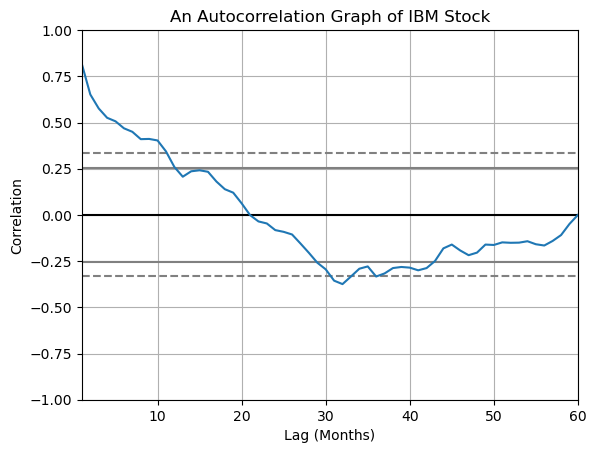

In [9]:
#Create an autocorrelation graph for the IBM stock
ibm=dfBms['IBM']
ibmplot = pd.plotting.autocorrelation_plot(ibm)
ibmplot.set_title("An Autocorrelation Graph of IBM Stock")
ibmplot.set_ylabel("Correlation")
ibmplot.set_xlabel("Lag (Months)")
ibmplot

<Axes: title={'center': 'An Autocorrelation Graph of META Stock'}, xlabel='Lag (Months)', ylabel='Correlation'>

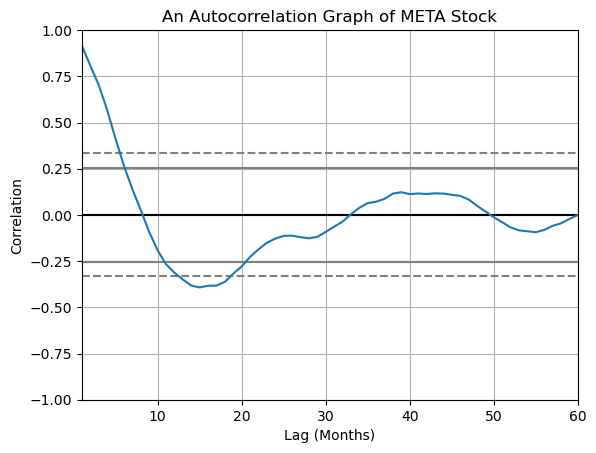

In [10]:
#Create an autocorrelation graph for the META stock
meta=dfBms['META']
metaplot = pd.plotting.autocorrelation_plot(meta)
metaplot.set_title("An Autocorrelation Graph of META Stock")
metaplot.set_ylabel("Correlation")
metaplot.set_xlabel("Lag (Months)")
metaplot

<Axes: title={'center': 'An Autocorrelation Graph of MMM Stock'}, xlabel='Lag (Months)', ylabel='Correlation'>

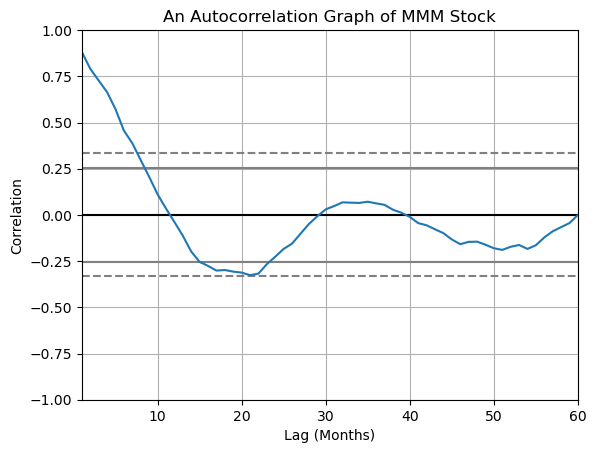

In [11]:
#Create an autocorrelation graph for the MMM stock
mmm=dfBms['MMM']
mmmplot = pd.plotting.autocorrelation_plot(mmm)
mmmplot.set_title("An Autocorrelation Graph of MMM Stock")
mmmplot.set_ylabel("Correlation")
mmmplot.set_xlabel("Lag (Months)")
mmmplot

## RESULTS

The autocorrelation above show that there was a positive vorrelation at the first 8-12 months of each stock. That being said META and AMZN stock also had some negative correlation after 10-12 months which suggests an alternating pattern for those two.

## QUESTION 4
Calculating the monthly returns for every stock. 

In [12]:
dfshift = dfBms.shift(1,fill_value=0)
dfshift

,AMZN,IBM,META,MMM
Date,,,,
2018-11-30,0.000000,0.000000,0.000000,0.000000
2018-12-31,84.508499,93.089043,140.610001,170.031342
2019-01-31,75.098503,85.148727,131.089996,155.818436
2019-02-28,85.936501,100.692291,166.690002,163.799927
2019-03-29,81.991501,104.676949,161.449997,170.770477
2019-04-30,89.037498,106.927658,166.690002,171.091599
2019-05-31,96.325996,106.298676,193.399994,156.047607
2019-06-28,88.753502,97.378044,177.470001,132.667923
2019-07-31,94.681503,105.744019,193.000000,143.954056


In [13]:
monthly_returns = dfBms - dfshift
monthly_returns

,AMZN,IBM,META,MMM
Date,,,,
2018-11-30,84.508499,93.089043,140.610001,170.031342
2018-12-31,-9.409996,-7.940315,-9.520004,-14.212906
2019-01-31,10.837997,15.543564,35.600006,7.981491
2019-02-28,-3.945000,3.984657,-5.240005,6.970551
2019-03-29,7.045998,2.250710,5.240005,0.321121
2019-04-30,7.288498,-0.628983,26.709991,-15.043991
2019-05-31,-7.572495,-8.920631,-15.929993,-23.379684
2019-06-28,5.928001,8.365974,15.529999,11.286133
2019-07-31,-1.342506,7.928848,1.229996,1.146042


In [14]:
#Remove the first month from the dataset since it would start at zero
monthly_returns=monthly_returns.iloc[1:, :]
monthly_returns

,AMZN,IBM,META,MMM
Date,,,,
2018-12-31,-9.409996,-7.940315,-9.520004,-14.212906
2019-01-31,10.837997,15.543564,35.600006,7.981491
2019-02-28,-3.945000,3.984657,-5.240005,6.970551
2019-03-29,7.045998,2.250710,5.240005,0.321121
2019-04-30,7.288498,-0.628983,26.709991,-15.043991
2019-05-31,-7.572495,-8.920631,-15.929993,-23.379684
2019-06-28,5.928001,8.365974,15.529999,11.286133
2019-07-31,-1.342506,7.928848,1.229996,1.146042
2019-08-30,-4.524498,-8.521683,-8.559998,-9.567215


# Autcorrelations for Monthly Returns

<Axes: title={'center': 'An Autocorrelation Graph of Amazon Stock'}, xlabel='Lag (Months)', ylabel='Correlation'>

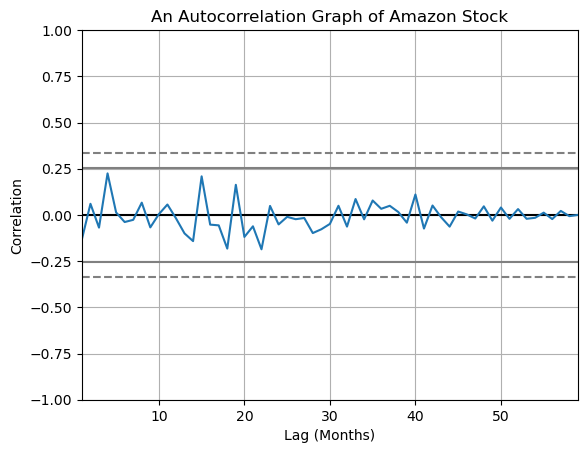

In [15]:
#Create an autocorrelation graph for the AMZN stock
amzn=monthly_returns['AMZN']
amznplot = pd.plotting.autocorrelation_plot(amzn)
amznplot.set_title("An Autocorrelation Graph of Amazon Stock")
amznplot.set_ylabel("Correlation")
amznplot.set_xlabel("Lag (Months)")
amznplot

<Axes: title={'center': 'An Autocorrelation Graph of IBM Stock'}, xlabel='Lag (Months)', ylabel='Correlation'>

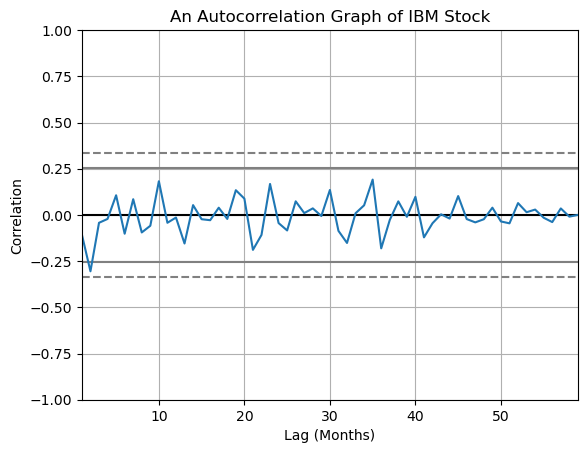

In [16]:
#Create an autocorrelation graph for the IBM stock
ibm=monthly_returns['IBM']
ibmplot = pd.plotting.autocorrelation_plot(ibm)
ibmplot.set_title("An Autocorrelation Graph of IBM Stock")
ibmplot.set_ylabel("Correlation")
ibmplot.set_xlabel("Lag (Months)")
ibmplot

<Axes: title={'center': 'An Autocorrelation Graph of META Stock'}, xlabel='Lag (Months)', ylabel='Correlation'>

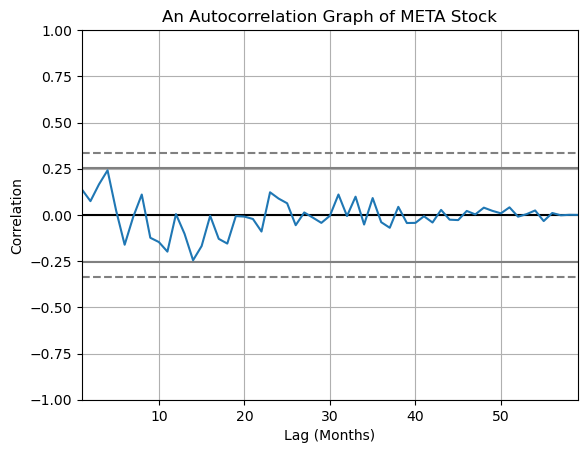

In [17]:
#Create an autocorrelation graph for the META stock
meta=monthly_returns['META']
metaplot = pd.plotting.autocorrelation_plot(meta)
metaplot.set_title("An Autocorrelation Graph of META Stock")
metaplot.set_ylabel("Correlation")
metaplot.set_xlabel("Lag (Months)")
metaplot

<Axes: title={'center': 'An Autocorrelation Graph of MMM Stock'}, xlabel='Lag (Months)', ylabel='Correlation'>

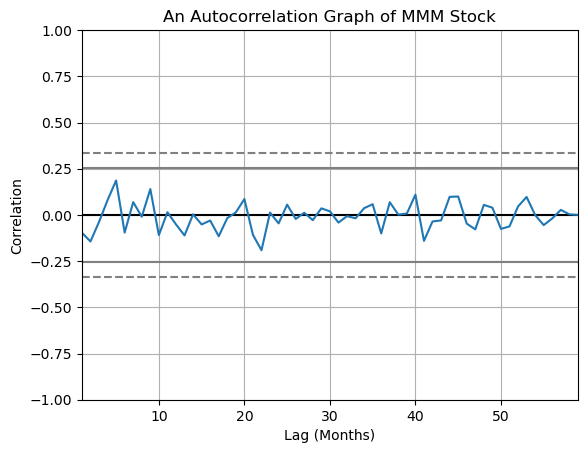

In [18]:
#Create an autocorrelation graph for the MMM stock
mmm=monthly_returns['MMM']
mmmplot = pd.plotting.autocorrelation_plot(mmm)
mmmplot.set_title("An Autocorrelation Graph of MMM Stock")
mmmplot.set_ylabel("Correlation")
mmmplot.set_xlabel("Lag (Months)")
mmmplot

# ARE THE RESULTS AUTO-CORRELATED
The results are not auto-correlated as we can see from the graphs above for all the stocks. This is because all the lines are within the confidence intervals.

# Question 6: Scatter Matrix


array([[<Axes: xlabel='AMZN', ylabel='AMZN'>,
        <Axes: xlabel='IBM', ylabel='AMZN'>,
        <Axes: xlabel='META', ylabel='AMZN'>,
        <Axes: xlabel='MMM', ylabel='AMZN'>],
       [<Axes: xlabel='AMZN', ylabel='IBM'>,
        <Axes: xlabel='IBM', ylabel='IBM'>,
        <Axes: xlabel='META', ylabel='IBM'>,
        <Axes: xlabel='MMM', ylabel='IBM'>],
       [<Axes: xlabel='AMZN', ylabel='META'>,
        <Axes: xlabel='IBM', ylabel='META'>,
        <Axes: xlabel='META', ylabel='META'>,
        <Axes: xlabel='MMM', ylabel='META'>],
       [<Axes: xlabel='AMZN', ylabel='MMM'>,
        <Axes: xlabel='IBM', ylabel='MMM'>,
        <Axes: xlabel='META', ylabel='MMM'>,
        <Axes: xlabel='MMM', ylabel='MMM'>]], dtype=object)

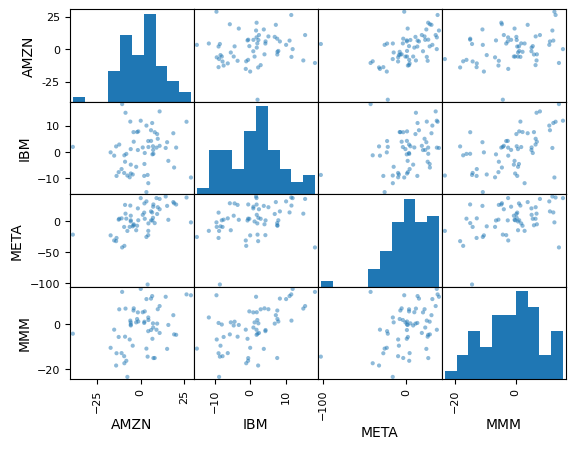

In [19]:
#plot the monthly returns
# I used the original dataset that I used to plot the monthly returns
pd.plotting.scatter_matrix(monthly_returns)

As we can see from the scattter matrix the AMZN stock has a slight positive correlation with META, and MMM. It does however not have any correlation with the IBM stock.
IBM has a slight positive correlation with META and MMM. 
META seems to have a slight positive correlation with all the stocks, and the same can be said for MMM. 
A positive correlation means that the monthly returns tend to move in the same direction this could be because they are in the same industry or something else. 